In [2]:
# this code is written by Changyi Yang used for DS Discovery program

import torch.nn as nn
import torch

import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import GridSearchCV

import pandas as pd

In [3]:
torch. __version__

'1.13.0+cpu'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/Shareddrives/PebbleReactorProject/Data

In [5]:
# do the data preprocessing

from sklearn.preprocessing import StandardScaler

def preprocessing(file_name):
    data = pd.read_csv(file_name, skiprows=[0]) # skip the first line
    data = data.iloc[:, 1:] # skip the first row

    ss = StandardScaler()


    data = ss.fit_transform(data)

    return data



In [8]:
# define the dataset classes



class ReactorData(Dataset):
    def __init__(self,data, sequence_length, start_percent = 0, end_percent = 1):
        
        
        length = data.shape[0]
        data = data[ int(length * start_percent)  : int(length * end_percent)]
        
        # print(data.shape)
        
        
        self.labels = data[:, -1:]
        self.data = data[:, 0:-1]
        

        
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.labels)//self.sequence_length
    
    def __getitem__(self,idx):
        idx = idx * self.sequence_length
        
        return (torch.tensor(self.data[idx : idx+ self.sequence_length])).double(), \
    (torch.tensor(self.labels[idx : idx+ self.sequence_length])).double()

        

In [9]:
# load the data
data = preprocessing('binnedpebbles.csv')




In [ ]:
# print(training_data[0][1])
# print(training_data[0][0].shape)
# print(training_data[0][1].shape)

# print(len(training_data[0]))
# print(len(training_data))

In [10]:
# define the neural nets
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, lstm_nums_layer, dropout):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        
        self.LSTM = nn.LSTM(input_dim, hidden_dim, lstm_nums_layer, batch_first = True)
        self.dropout = nn.Dropout(dropout)
        
        self.hidden_to_output = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, input):
        # print(input.shape)
        
        hidden_state, _ = self.LSTM(input)
        
        # print(hidden_state.shape)
        output = self.dropout(hidden_state)
        output = self.hidden_to_output(output)
        
        
        return output
    
    


In [11]:
# train the model

input_dim = training_data[0][0].shape[1]
output_dim = training_data[0][1].shape[1]


# print(output_dim)

# some adjustable hyper-parameters

hidden_dim = 64
num_hidden_layers = 2
batch_size = 32
learning_rate = 1e-3
weight_decay = 1e-5
epoch_num = 128
dropout = 0.2


def train(hidden_dim, num_hidden_layers, batch_size, learning_rate, weight_decay, epoch_num, dropout):
    model = SimpleLSTM(input_dim, hidden_dim, output_dim, num_hidden_layers, dropout)
    model = model.double()

    train_dataloader = DataLoader(training_data, batch_size = batch_size)


    # the chosn loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= weight_decay)

    for epoch in range(epoch_num):
    
        for batch, (X, y) in enumerate(train_dataloader):
            model.zero_grad()
        
            pred = model(X)
        
            # print(X.shape)
            # print(y.shape)
        
            loss = loss_fn(pred, y)
        
            # backpropagation
        
            loss.backward()
            optimizer.step()
        
            loss = loss.item()
        
        #if epoch % 5 == 0:
         #   print("The loss is {} in epoch {}".format(loss ,epoch))
    return model
            

#print(f"The training is ended, the final loss is {loss}.")
print("Bye")

Bye


In [12]:
def test(model, testing_data):
    X_test = (torch.tensor(testing_data.data)).double()
    y_test = (torch.tensor(testing_data.labels)).double()

    y_pred = model(X_test)
    loss = nn.MSELoss()
    print(f"The test loss is {loss(y_pred, y_test).item()}")
    return loss(y_pred, y_test).item()

In [13]:
trained_model = train(hidden_dim, num_hidden_layers, batch_size, learning_rate, weight_decay, epoch_num, dropout)
test(trained_model, testing_data)

The test loss is 0.034738907619080994


0.034738907619080994

In [14]:
best_loss = 1
best_params = [0] * 5

for i in range(5, 8):
    hidden_dim = 2**i
    for k in range(-1, 2):
        dropout = (2**k)*0.1
        for l in range(2, 6):
            learning_rate = 10**(-l)
            for m in range(2, 6):
                weight_decay = 10**(-l)
                for n in range(2, 6):
                    batch_size = 2**n
                    trained_model = train(hidden_dim, 2, batch_size, learning_rate, weight_decay, 100, dropout)
                    loss = test(trained_model, testing_data)
                    if loss < best_loss:
                        best_loss = loss
                        best_params[0] = hidden_dim
                        best_params[1] = dropout
                        best_params[2] = learning_rate
                        best_params[3] = weight_decay
                        best_params[4] = batch_size


                        
                        
print("iterations completed")                        
print(best_params)
print(best_loss)

The test loss is 0.05651780836450916
The test loss is 0.027763532525804324
The test loss is 0.03343385795155543
The test loss is 0.025557887086024102
The test loss is 0.04133472740029978
The test loss is 0.021981071807493084
The test loss is 0.038932689676648535
The test loss is 0.03284203252193553
The test loss is 0.03773244496573792
The test loss is 0.027446040045577293
The test loss is 0.021106388296904238
The test loss is 0.023983256926678683
The test loss is 0.04732917614957311
The test loss is 0.06436866402933018
The test loss is 0.10345313266996868
The test loss is 0.030780453253749306
The test loss is 0.041212190793129745
The test loss is 0.02905234600439425
The test loss is 0.031490985030232614
The test loss is 0.02985827031579319
The test loss is 0.03332522705161096
The test loss is 0.029116950286383395
The test loss is 0.028325007162669533
The test loss is 0.02267653185527492
The test loss is 0.022825073630918243
The test loss is 0.02032746566846006
The test loss is 0.027133

In [16]:
# get the best train model
best_model = train(best_params[0], 2, best_params[4], best_params[2], best_params[3], 100, best_params[1])
test(best_model, testing_data)

The test loss is 0.015634625265076967


0.015634625265076967

In [ ]:
#param_grid = {'hidden_dim': [32, 64, 128],  
              #'num_hidden_layers': [1, 2, 3], 
              #'batch_size':[5, 10, 15, 20, 25, 30],
              #'learning_rate': [1e-2, 1e-3, 1e-4, 1e-5],
              #'weight_decay': [1e-2, 1e-3, 1e-4, 1e-5],
              #'epoch_num': [100, 150, 200]
              #'dropout': [0.05, 0.1, 0.2, 0.3]}  
#gs_lstm = GridSearchCV(train,
                      #param_grid=param_grid,
                      #scoring=test,
                      #cv=5)

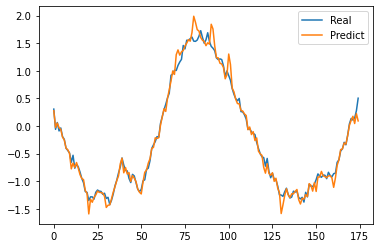

In [19]:
# visualize the training output

import matplotlib.pyplot as plt


X_train = (torch.tensor(training_data.unshaped_data)).double()
y_train = (torch.tensor(training_data.unshaped_labels)).double()


plt.figure()
plt.plot(y_train, label = "Real")     
plt.plot(best_model(X_train).detach().numpy(), label = "Predict")
plt.legend()


0.016622703026495007


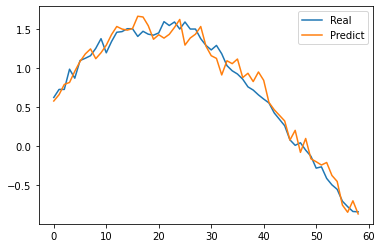

In [18]:
# visualize the test output

import matplotlib.pyplot as plt


X_test = (torch.tensor(testing_data.data)).double()
y_test = (torch.tensor(testing_data.labels)).double()

y_pred = best_model(X_test)

loss = nn.MSELoss()
print(loss(y_pred, y_test).item())

plt.figure()
plt.plot(y_test, label = "Real")     
plt.plot(y_pred.detach().numpy(), label = "Predict")
plt.legend()